# Regresión logística

En lugar de realizar una predicción de un valor queremos hacer un clasificador.


Si lo que tenemos son dos grupos y queremos realizar una clasificación, tenemos que realizar ciertas modificaciones a la regresión lineal.




La fórmula de la regresión lineal es:
\\[
\hat{Y}=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p = \sum \beta_k X_k
\\]

Podemos tratar de asignar una probabilidad. Pero hay un problema porque esta regresión va entre 0 y 1.


Por ejemplo: Trabajamos en un maderera y queremos saber si un tronco es de un abedul o de un abeto basándonos únicamente en el diametro y la longitud del tronco.

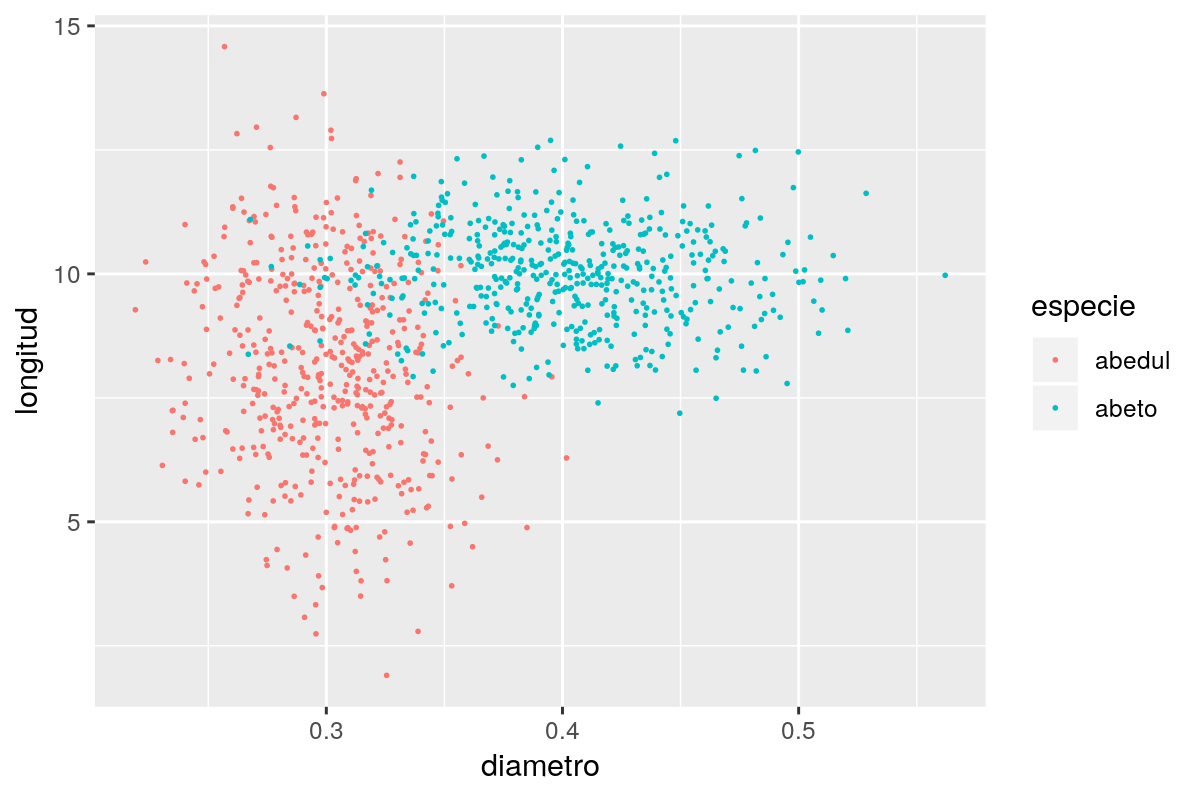

In [1]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

library(ggplot2)
N<-500
set.seed(123)
#df1<-data.frame(diametro=rnorm(N,mean=0.40,sd=0.05),longitud=rnorm(N,mean=10,sd=1),especie="abeto")
#df2<-data.frame(diametro=rnorm(N,mean=0.30,sd=0.03),longitud=rnorm(N,mean=8,sd=2),especie="abedul")

#arboles<-rbind(df2,df1)

#write.csv(arboles, file = "data/arboles.csv")
arboles<-read.csv("data/arboles.csv")
ggplot(arboles,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)


Podemos hacer una clasificación con un modelo lineal donde creamos una nueva columna *especie.n* y le asignamos:
* abeto  = 1
* abedul = 0

Utilizamos un modelo lineal tal que:
\\[
  especie = \beta_0+\beta_1·diametro+\beta_2·longitud
\\]

Entonces:
* si especie >= 0.5 es un abeto
* si especie <  0.5 es un abedul

La recta que marcará el umbral será:
\\[
\begin{split}    
  0 &= \beta_0+\beta_1·diametro+\beta_2·longitud \\
  -\beta_2 longitud &= \beta_0+\beta_1·diametro - 0.5\\
  longitud &= \frac{0.5-\beta_0}{\beta_2}-\frac{\beta_1}{\beta_2}·diametro
\end{split}  
\\]


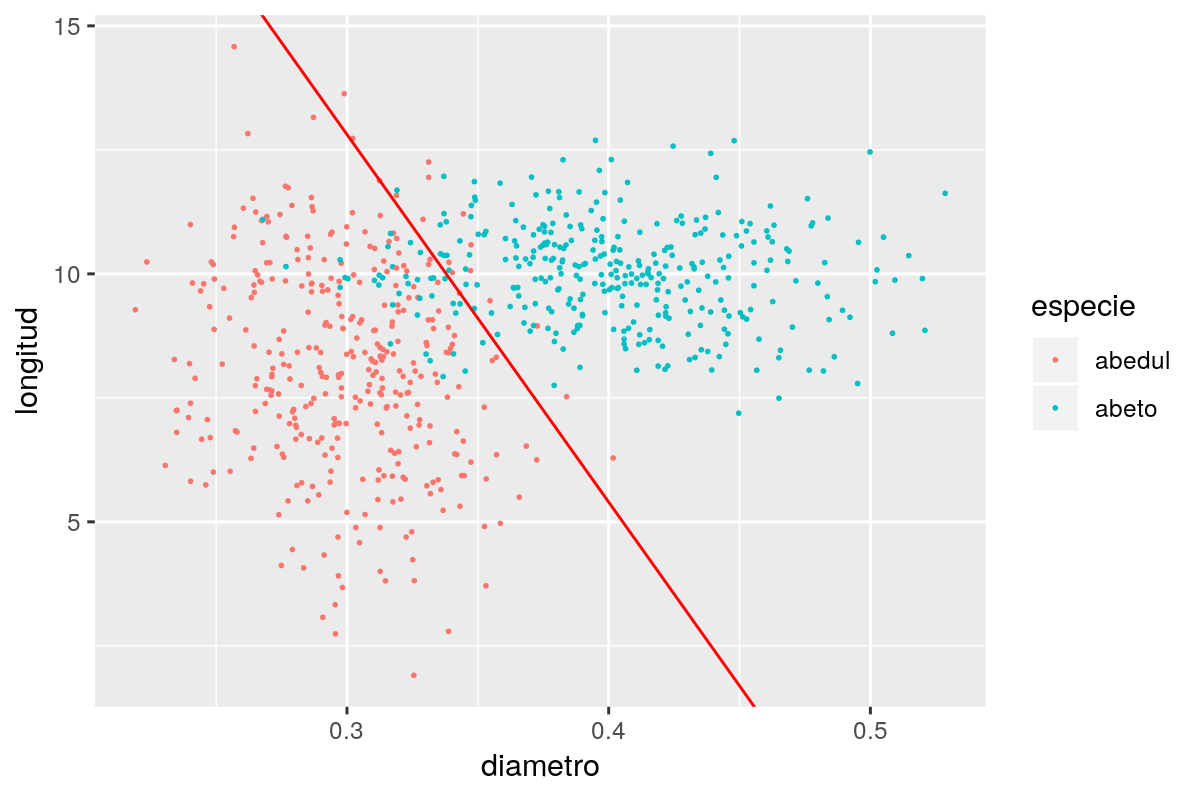

In [2]:
arboles$especie.n[arboles$especie=="abeto"] <-   1
arboles$especie.n[arboles$especie=="abedul"]<- 0


itrain<-sample(1:nrow(arboles),round(nrow(arboles)*0.7))
arboles.train<-arboles[itrain,]
arboles.test<-arboles[-itrain,]


modellm<-lm(data=arboles.train,formula=especie.n~diametro+longitud)
beta<-modellm$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = (0.5-beta[1])/beta[3],slope = -beta[2]/beta[3], color="red" )

Pero esto no es del todo correcto porque los datos **NO** siguen una distribución gaussiana. Siguen una distribución **binomial** con dos posibles valores 0 o 1.

La distribución binomial es una generalización de la distribución de Bernoulli para $n$ sucesos independientes, cada uno de los cuales tiene dos posibles resultados Si/No con probabilidad $p$.

**Ejemplo:** Tiramos al aire 3 monedas y mirarmos cual es la probabilidad de que 2 salgan cara.

Variables que definen la distribución:
* p - probabilidad de éxito de un caso individual
* n - número de eventos totales que se desean medir
* k - número de eventos que ha salido SI.

Estimadores **media** ($\mu$) y **varianza** ($\sigma^2$):
\\[
\mu=n·p \qquad
\sigma^2=n·p·(1-p)
\\]

Si tenemos $n$ sucesos independientes que siguen una distribución de Bernoulli, ¿cual es la probabilidad de que $k$ sucesos sean positivos?. 
Si sabemos que la probabilidad de un suceso ($k=1$) que sigue una distribución Bernoulli viene dada por la función de distribución:
\\[
Pr_{Bernoulli}(X=k)=p^k(1-p)^{n-k} \qquad k \in \left\{0,1 \right\}.
\\]

Al tener $k$ sucesos donde $k \in \left\{0,1,2,...,n \right\}$, la función será la de Bernoulli multiplicada por el coeficiente binomial que acabamos de ver:
\\[
Pr(X=k)=\binom{n}{k}p^k(1-p)^{n-k}
\\]
La función acumulativa será:
\\[
Pr(X \leq k)= \sum_{i=0}^{k-1} \binom{n}{k}p^k(1-p)^{n-k}
\\]



#### función de enlace (link function)

Para pasar del dominio de números reales $(-\infty,\infty)$ al de probabilidades $[0,1]$ a vamos a utilizar la **función logística**:
\\[
p = h(x)=  \frac{1}{1+e^{-x}}
\\]
Su inversa se conoce como la función **logit**:
\\[
h^{-1}(p) = log \left( \frac{p}{1-p} \right)
\\]

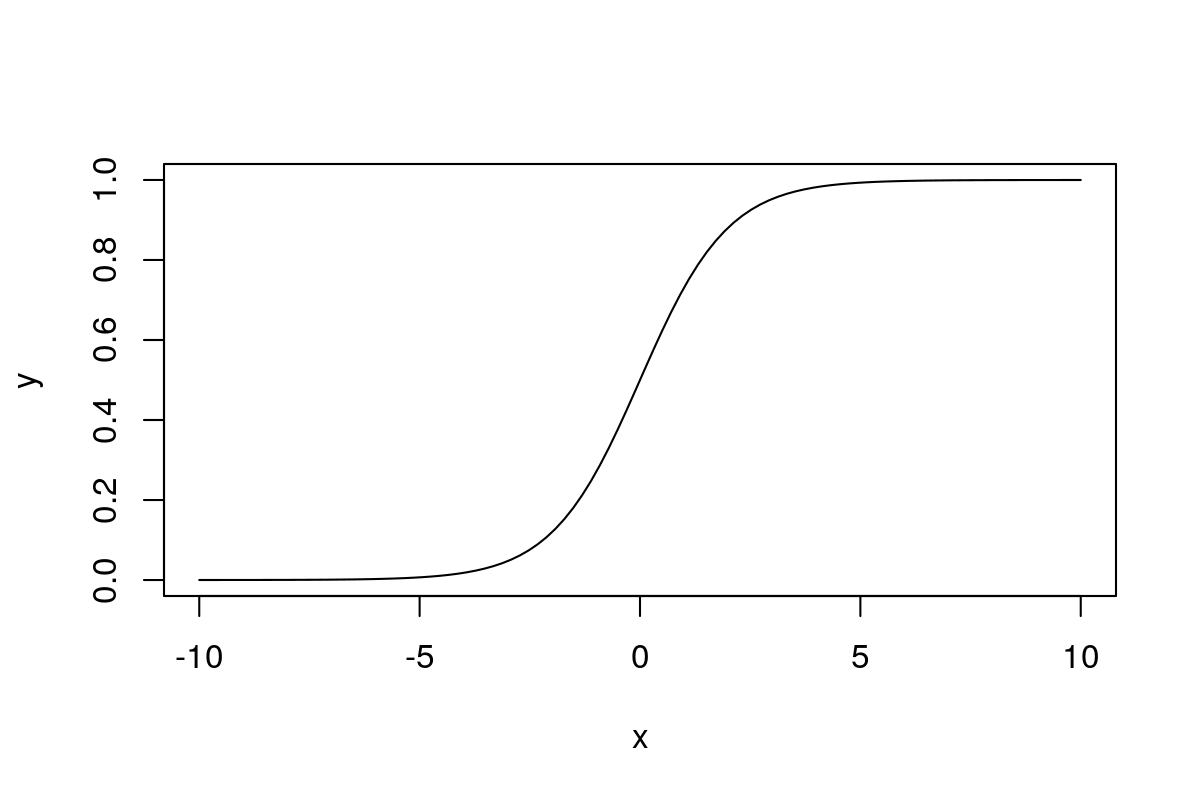

In [3]:
x<-seq(-10,10,length.out = 100)
y<-1/(1+exp(-x))
plot(x,y,t="l")

Es decir, cuando estemos trabajando con una **distribución binomial** un modelo lineal del tipo:
\\[
y = \beta \vec{x}+\beta_0
\\]
será:
\\[
y = p(x) = \frac{1}{1+e^{-\beta \vec{x}-\beta_0}} 
\\]
Ahora $p(x)$ es una función que muestra valores en el rango $[0,1]$, puede ser considerada como una probabilidad.

Y tenemos el siguiente clasificador:
* Seleccionamos clase 1 si p(x)>=0.5
* Seleccionamos clase 0 si p(x)< 0.5



Es decir, tenemos una probabilidad, su valor está en el rango $[0,1]$:
\\[
    p = \frac{1}{1-e^{-\hat{Y}}}= \frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}   
\\]

Definimos la razón de monomios (Odds ratio) como el cociente entre dos probabilidades, su valor está en el rango $[0,\infty]$:
\\[
Odds=\frac{p(x)}{1-p(x)} = \frac{\frac{1}{1+e^{-\beta \vec{x}-\beta_0}}}{1-\frac{1}{1+e^{-\beta \vec{x}-\beta_0}} }
\\]
\\[
Odds=\frac{p(x)}{1-p(x)} = \frac{1}{1+e^{-\beta \vec{x}-\beta_0}-1} 
\\]
\\[
Odds=\frac{p(x)}{1-p(x)} = e^{\beta \vec{x}+\beta_0}
\\]


\\[
 Odds = \frac{p}{1-p}=\frac{\frac{1}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}{\frac{e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}{1-e^{-(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}}}=e^{(\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p)}
\\]

Si aplicamos el logaritmo a la razón de monomios tenemos un valor que está en el rango $[-\infty,\infty]$:
\\[
 log(Odds)= log \left(\frac{p}{1-p} \right) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]

La función de coste que vamos a tratar de minimizar será:
\\[
\begin{split}
Cost(p(x),y) &= {1 \over n} \sum_{i=0}^n{(y-\hat{y})^2}\\
Cost(p(x),y) &= {1 \over n} \sum_{i=0}^n{(y-p(x)^2)}
\end{split}
\\]
Que transformaremos en:
\\[
Cost(p(x),y) = -y ·log(p(x))-(1-y)·log(1-p(x))
\\]


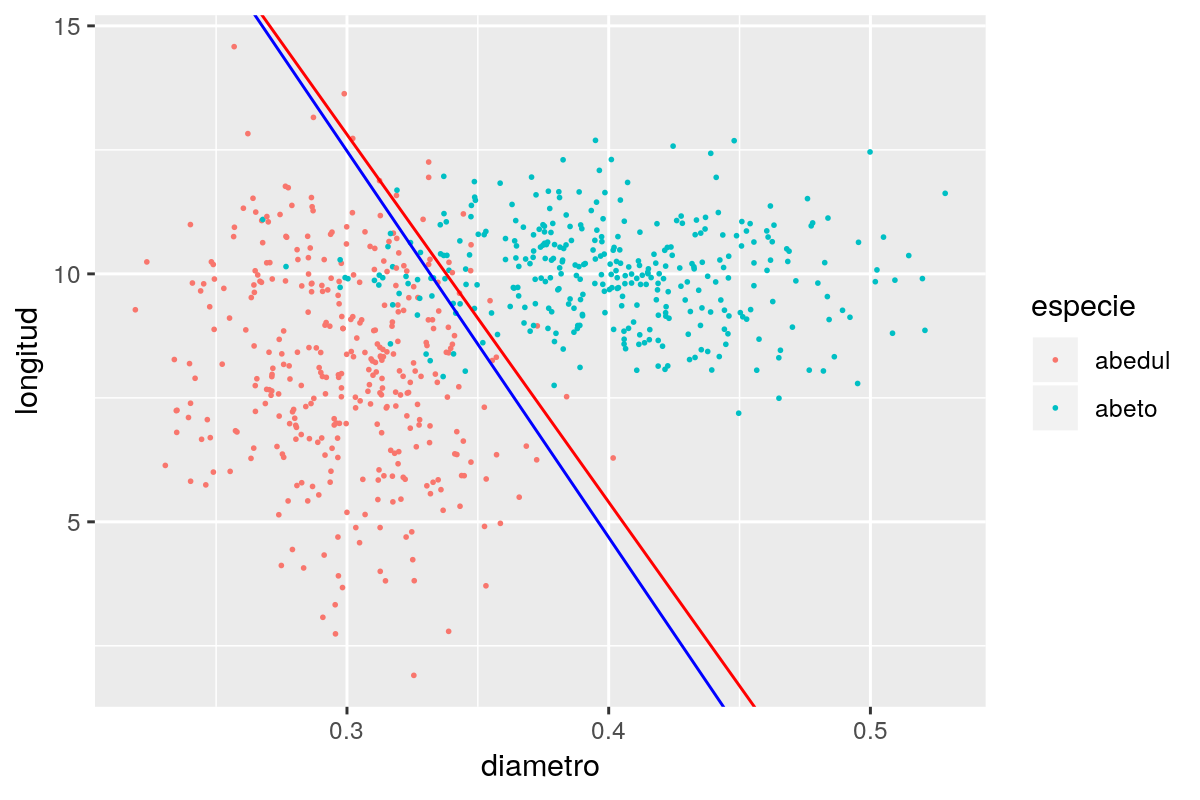

In [4]:
model<-glm(data=arboles.train,formula=especie~diametro+longitud,family=binomial(link='logit'))
betalg<-model$coefficients

ggplot(arboles.train,aes(x=diametro,y=longitud,color=especie))+geom_point(size=0.3)+
 geom_abline(intercept = (0.5-beta[1])/beta[3],slope = -beta[2]/beta[3], color="red" )    +
 geom_abline(intercept = -betalg[1]/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )    

La salida del modelo es log(odds):
\\[
 y = log(Odds) = \beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p
\\]
Si queremos la probabilidad tenemos que aplicar un poco de cálculo:
\\[
 Odds = \frac{p}{1-p}
\\]
\\[
 y = log(Odds) = log \left( \frac{p}{1-p} \right) \\
 e^y = \left( \frac{p}{1-p} \right) \\
 e^y·(1-p) = p \\
 e^y = p+p·e^y \\
 e^y = p·(1+e^y) \\
 p=\frac{e^y}{1+e^y}
\\]




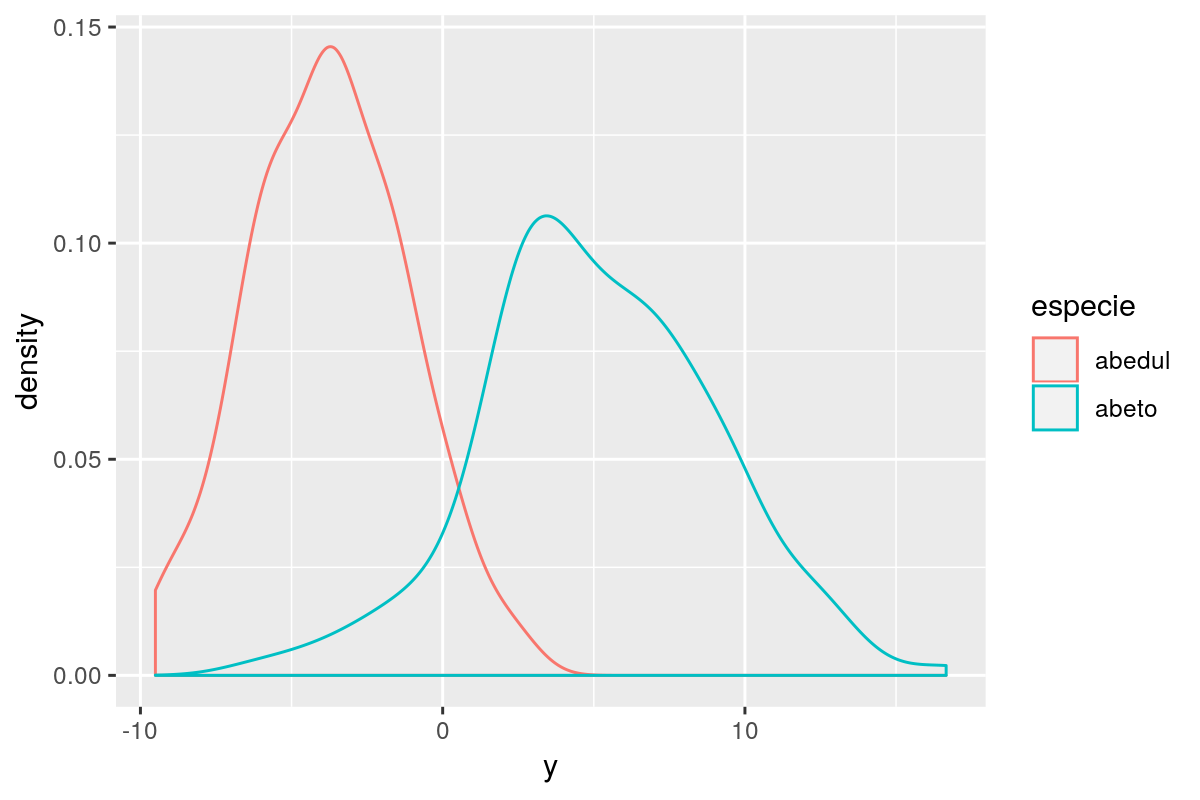

In [5]:
out<-arboles.test
out["y"]<-predict(model,arboles.test)

ggplot(out,aes(x=y,color=especie))+geom_density()

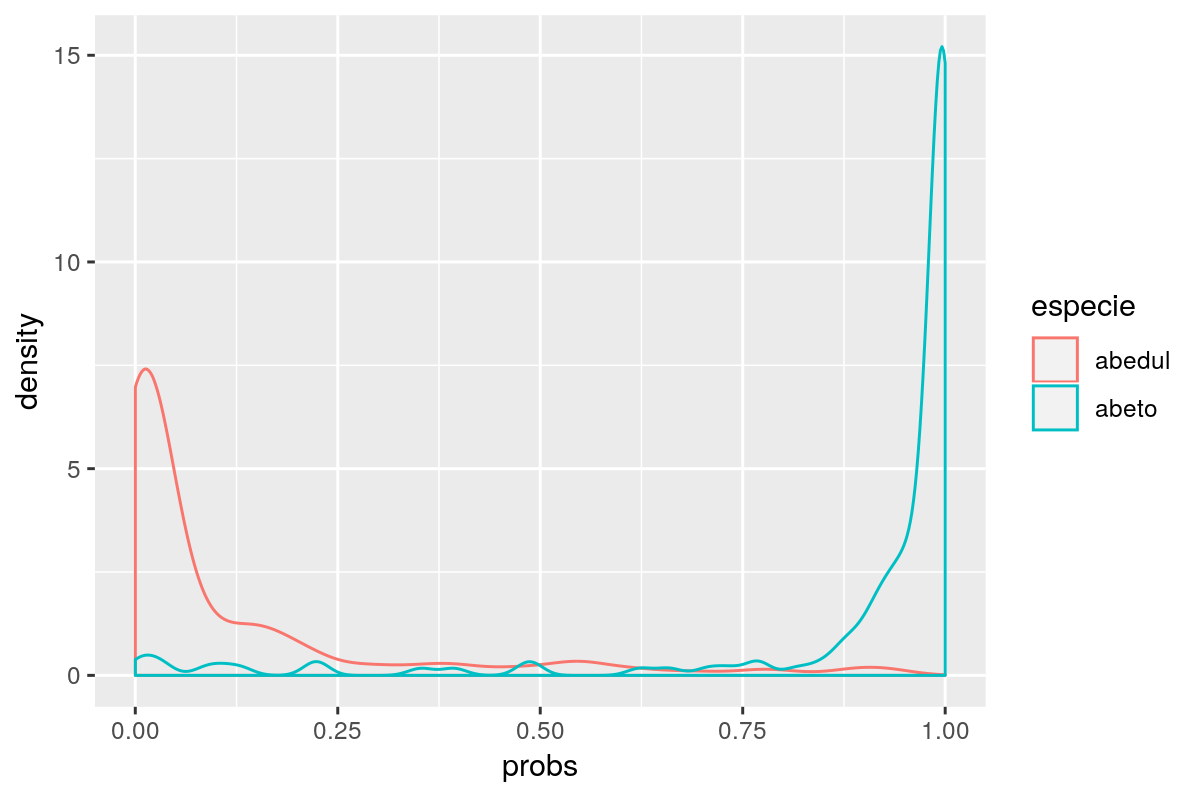

In [6]:
out<-arboles.test
out["y"]<-predict(model,arboles.test)
out["probs"]<-exp(out["y"])/(1+exp(out["y"]))

ggplot(out,aes(x=probs,color=especie))+geom_density()

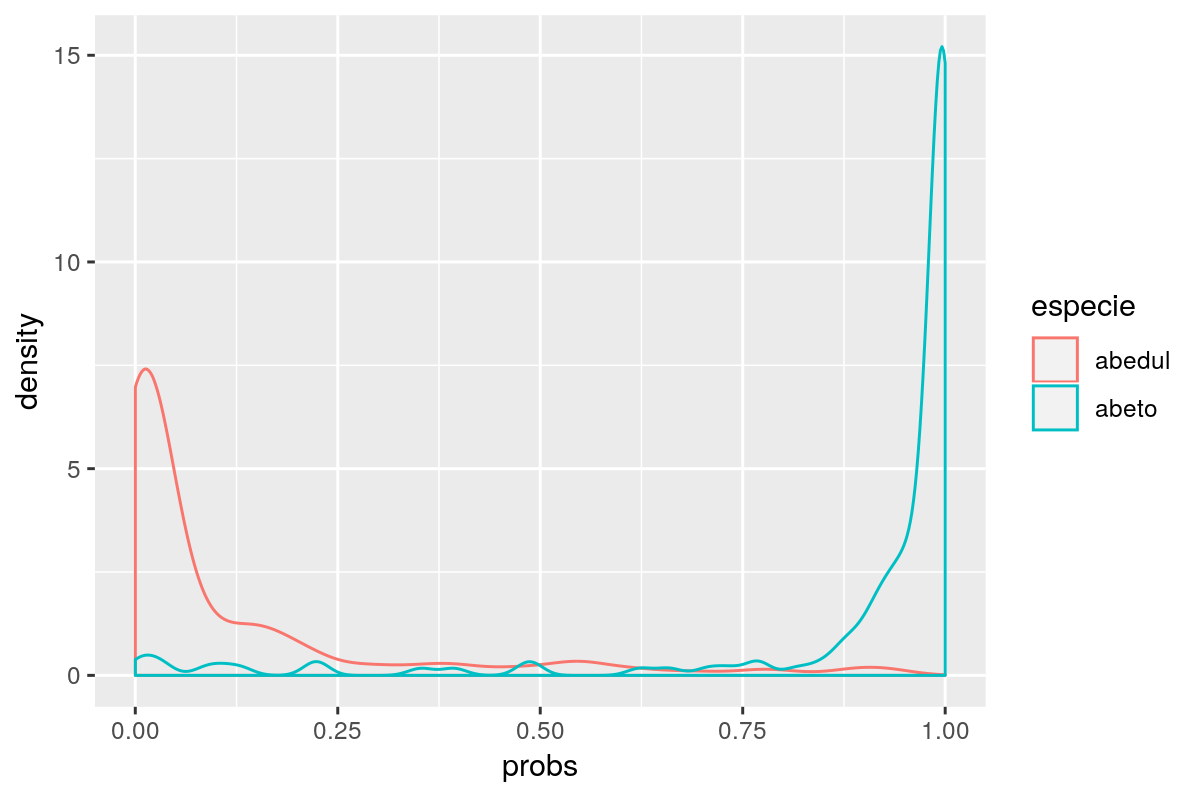

In [7]:
out["probs"]<-predict(model,arboles.test,type="response")

ggplot(out,aes(x=probs,color=especie))+geom_density()

## Matriz de confusión

Aqui lo que tenemos es un clasificador con dos hipótesis $H_0$ y $H_1$. 
Si nuestro test estadístico dice que la hipótesis $H_1$ es cierta pero en realidad la que es cierta es la hipótesis $H_0$ estaremos cometiendo un error.
El tipo de error depende de si nos hemos equivocado prediciendo $H_0$ o $H_1$.

|.|$H_0$ cierta|$H_1$ cierta|
|-|-|-|
|Elegimos $H_0$| No hay error |Error tipo II, falso negativo|
|Elegimos $H_1$| Error tipo I, falso positivo| No hay error |


La matriz de confusión lo que hace es contar el número de ocurrencias que ha habido en cada celda:

145,25
2,128


        
y_est    abedul abeto
  abedul    145    25
  abeto       2   128

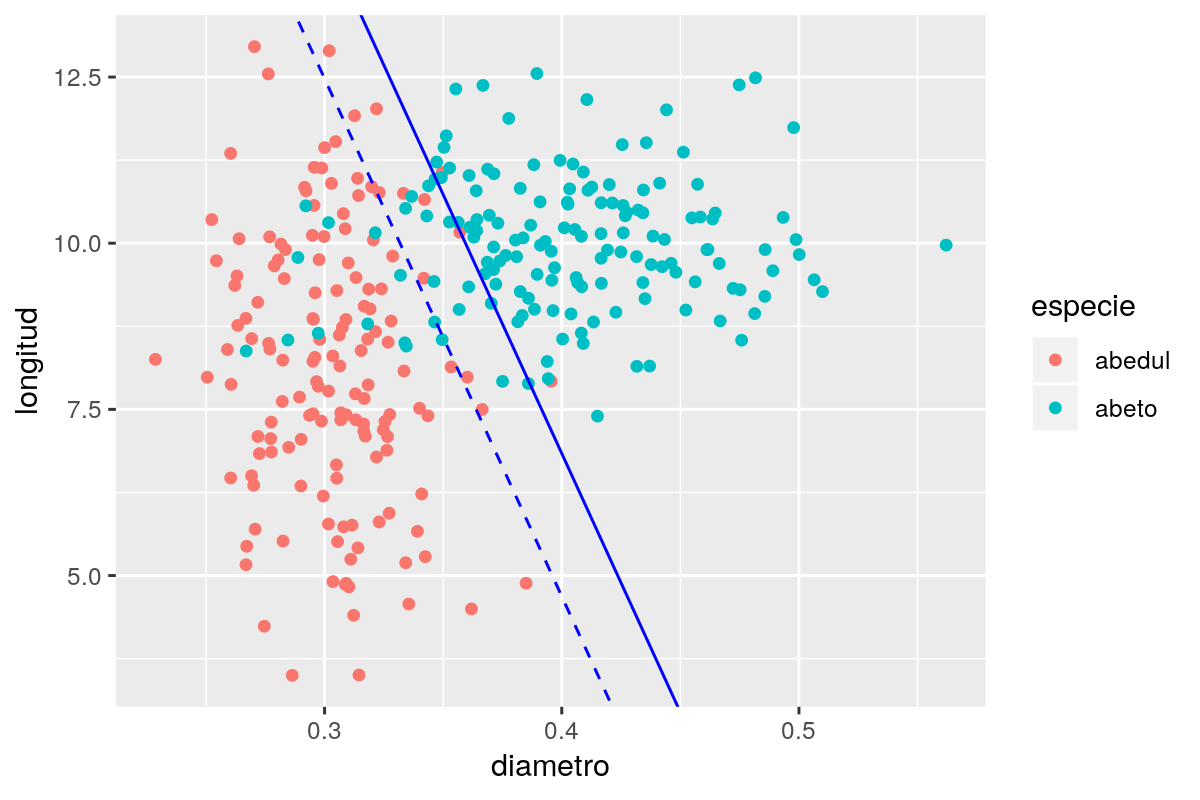

In [22]:
M<-matrix(rep(0,4),ncol = 2)
umbral <- 2

y_est=factor(ifelse(predict(model,arboles.test)< umbral,0,1),labels=c("abedul","abeto"))
idx_abedul<-arboles.test$especie=="abedul"
idx_abeto <-arboles.test$especie=="abeto"


M[1,1]=sum(y_est[idx_abedul]=="abedul")
M[1,2]=sum(y_est[idx_abeto]=="abedul")
M[2,1]=sum(y_est[idx_abedul]=="abeto")
M[2,2]=sum(y_est[idx_abeto]=="abeto")
M
table(y_est,arboles.test$especie)

ggplot(arboles.test,aes(x=diametro,y=longitud,color=especie))+geom_point()+
 geom_abline(intercept = (-betalg[1])/betalg[3],slope = -betalg[2]/betalg[3], color="blue", linetype="dashed")+
 geom_abline(intercept = (umbral-betalg[1])/betalg[3],slope = -betalg[2]/betalg[3], color="blue" )

### Medidas de calidad

Imaginemos que tenemos la siguiente matriz de confusión:

|.|Condición positiva|Condición negativa|
|-|-|-|
|Predecimos condición positiva| $M_{11}$ | $M_{12}$|
|Predecimos condición negativa| $M_{21}$| $M_{22}$ |

**Precisión** : $\frac{M_{11}}{M_{12}+M_{11}}$. Cuantos aciertos tengo del total de predicciones.

**Exhaustividad** (recall): $\frac{M_{11}}{M_{21}+M_{11}}$. Que ratio de los aciertos positivos soy capaz de encontrar.

**Exactitud** (Accuracy): $\frac{M_{11}+M_{22}}{M_{11}+M_{12}+M_{21}+M_{22}}$: Cuantas predicciones correctas he hecho.

**Valor-F**: $F_\beta=(1+\beta^2)\frac{Precisión·Exhaustividad}{\beta^2·Precisión+Exhaustividad}$



## Curva ROC

Se utiliza para ver la calidad de un detector, un clasificador binario capaz de detectar un elemento.
Se hace un barrido por todos los umbrales y se mide el valor de positivo verdadero en función de falso positivo.

Warning message:
“Removed 2 rows containing missing values (geom_path).”


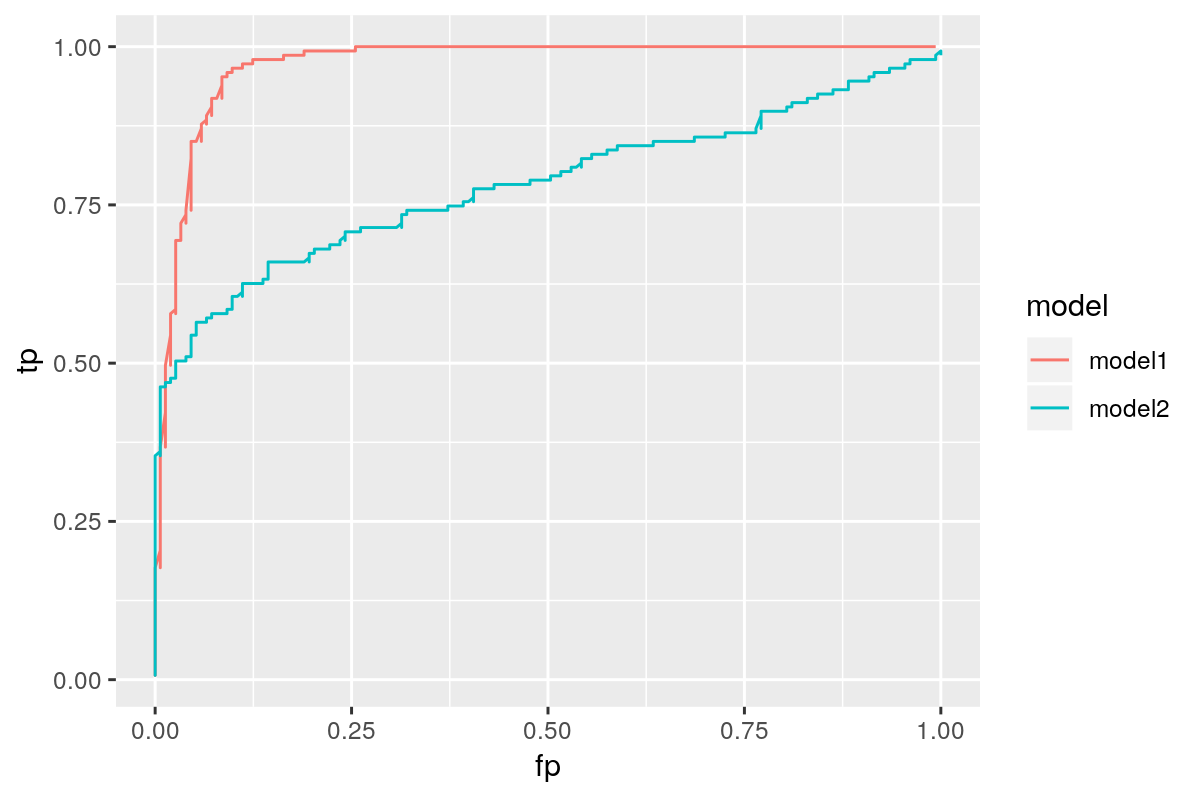

In [9]:
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_abedul<-y_real==1
    idx_abeto <-y_real==0

    M<-table(y_est,arboles.test$especie)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

model<-glm(data=arboles.train,formula=especie~diametro+longitud,family=binomial(link='logit'))

y_predict<-predict(model,arboles.test)
dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

model2<-glm(data=arboles.train,formula=especie~longitud,family=binomial(link='logit'))
y_predict<-predict(model2,arboles.test)
dfROC2<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model2")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,arboles.test$especie.n,dfROC2$th[i])
    dfROC2$tp[i]<-v["tp"]
    dfROC2$fp[i]<-v["fp"]
}
dfROC<-rbind(dfROC,dfROC2)
dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




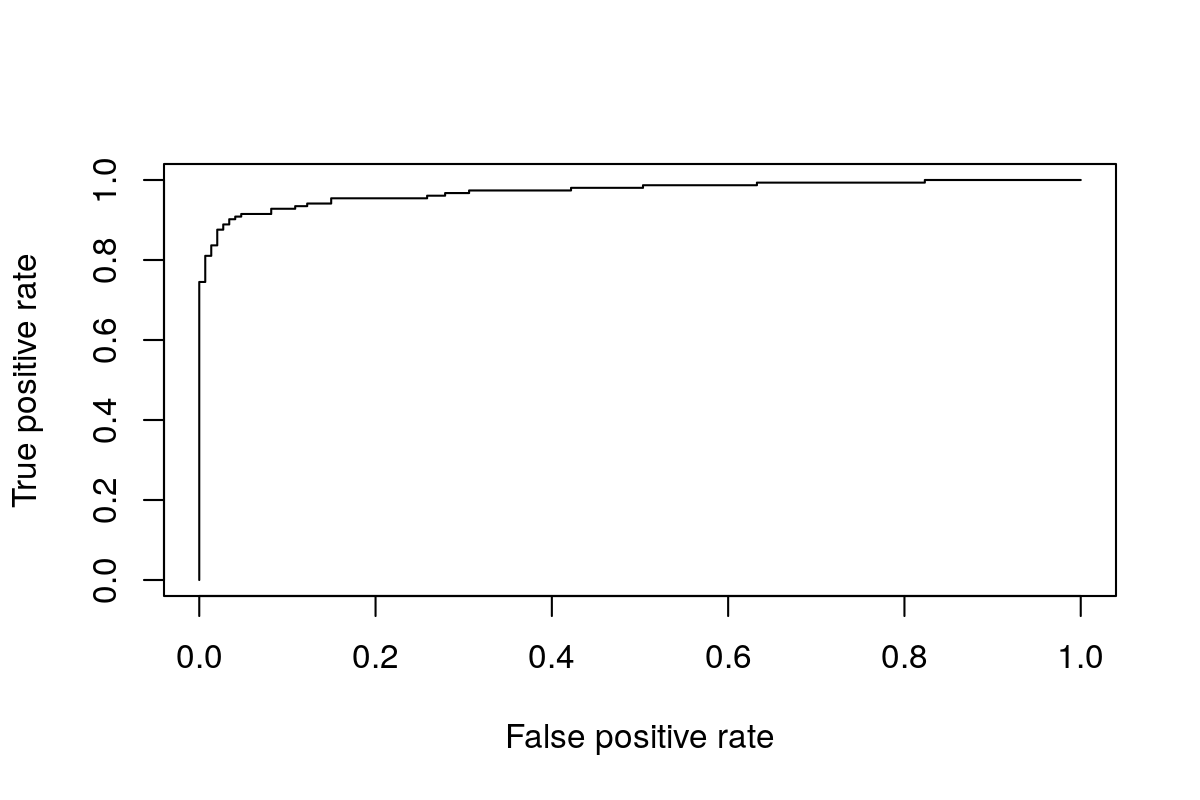

In [10]:
library(ROCR)

model<-glm(data=arboles.train,formula=especie~diametro+longitud,family=binomial(link='logit'))

p<-predict(model,arboles.test,type="response")

pr <- prediction(p, arboles.test$especie)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

### AUC

Area bajo la curva (Area Under The Curve), número entre 0 y 1 que mide como de bueno es un clasificador. 

Es el area bajo la curva ROC, cuando su valor es:
* 1 significa que el clasificador es perfecto
* 0.5 significa que la elección es tan buena como hacerla al azar
* Menor de 0.5, significa que lo estamos haciendo peor que el azar

In [11]:
performance(pr, measure = "auc")

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.9714108


Slot "alpha.values":
list()


#### Ejemplo

Este conjunto de datos contiene información sobre los resultados del tratamiento de verrugas de 90 pacientes que usan crioterapia.

https://archive.ics.uci.edu/ml/datasets/Cryotherapy+Dataset+

Información de columnas:
* Sexo
* Edad
* Tiempo
* Número de verrugas
* Tipo
* Area
* Resultado del tratamiento

In [23]:
cryo<-read.csv('data/Cryotherapy.csv')
cryo$sex<-factor(cryo$sex,labels=c("Mujer","Hombre"))
cryo$Type<-factor(cryo$Type,labels=c("Común","Plantar","Ambas"))
cryo$Result_of_Treatment<-factor(cryo$Result_of_Treatment,labels=c("No","Si"))
summary(cryo)

     sex          age            Time        Number_of_Warts       Type   
 Mujer :47   Min.   :15.0   Min.   : 0.250   Min.   : 1.000   Común  :54  
 Hombre:43   1st Qu.:18.0   1st Qu.: 4.562   1st Qu.: 2.000   Plantar: 9  
             Median :25.5   Median : 8.500   Median : 5.000   Ambas  :27  
             Mean   :28.6   Mean   : 7.667   Mean   : 5.511               
             3rd Qu.:35.0   3rd Qu.:10.688   3rd Qu.: 8.000               
             Max.   :67.0   Max.   :12.000   Max.   :12.000               
      Area        Result_of_Treatment
 Min.   :  4.00   No:42              
 1st Qu.: 20.00   Si:48              
 Median : 70.00                      
 Mean   : 85.83                      
 3rd Qu.:100.00                      
 Max.   :750.00                      

In [24]:
num_train=round(0.7*nrow(cryo))
train_ind<-sample(1:nrow(cryo),size = num_train)

cryo.train=cryo[train_ind,]
cryo.test =cryo[-train_ind,]

In [25]:
model<-glm(data=cryo.train,formula=Result_of_Treatment~.,family=binomial())

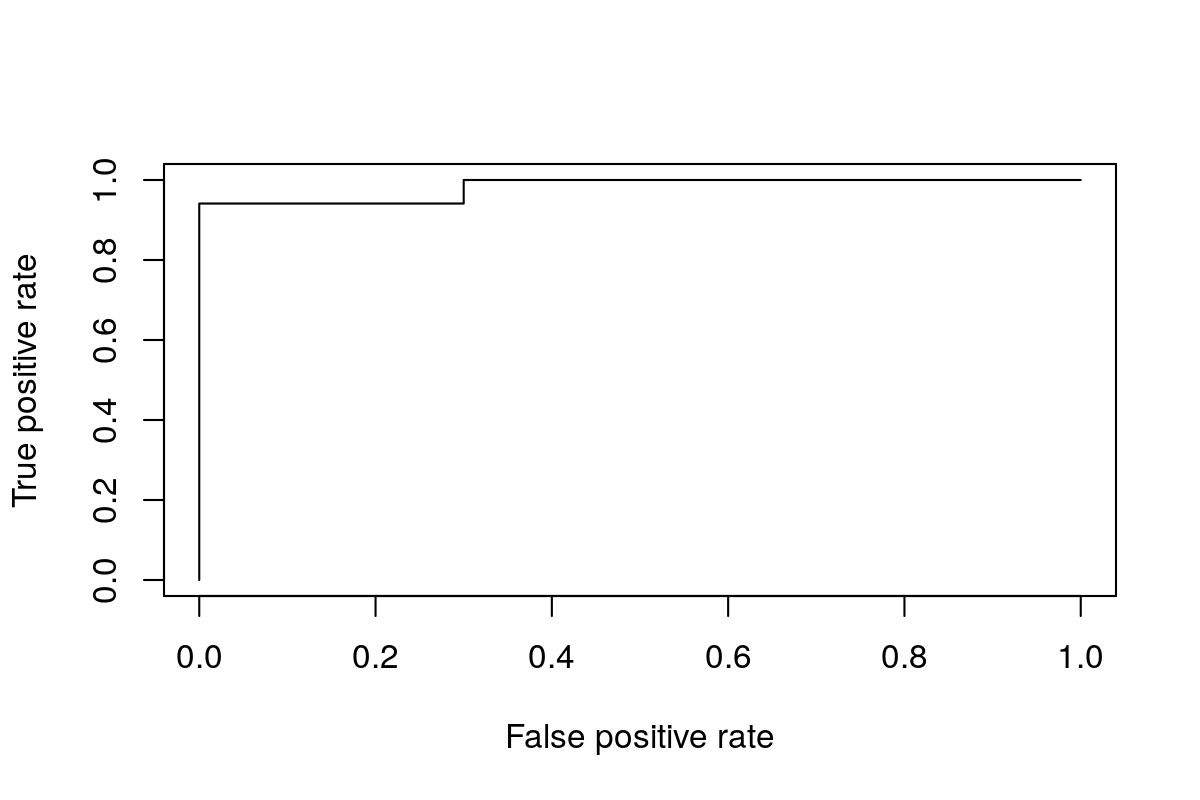

In [26]:
library(ROCR)
options(repr.plot.height=4,repr.plot.width=6)


p<-predict(model,cryo.test,type="response")

pr <- prediction(p, cryo.test$Result_of_Treatment)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [27]:
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

[1] "The AUC is 0.982352941176471"

In [28]:
summary(model)


Call:
glm(formula = Result_of_Treatment ~ ., family = binomial(), data = cryo.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.86620  -0.03810  -0.00009   0.06272   1.84094  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)     18.449156   8.107200   2.276   0.0229 *
sexHombre       -1.930754   1.731393  -1.115   0.2648  
age             -0.210846   0.130348  -1.618   0.1058  
Time            -1.252001   0.521556  -2.401   0.0164 *
Number_of_Warts -0.146347   0.270350  -0.541   0.5883  
TypePlantar      4.361696   2.867274   1.521   0.1282  
TypeAmbas       -5.089790   4.614467  -1.103   0.2700  
Area             0.002103   0.016889   0.124   0.9009  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87.321  on 62  degrees of freedom
Residual deviance: 18.911  on 55  degrees of freedom
AIC: 34.911

Number of Fisher Scoring i

In [29]:
library(MASS)
stepAIC(model)

Start:  AIC=34.91
Result_of_Treatment ~ sex + age + Time + Number_of_Warts + Type + 
    Area

                  Df Deviance    AIC
- Area             1   18.926 32.926
- Number_of_Warts  1   19.226 33.226
- sex              1   20.451 34.451
<none>                 18.911 34.911
- age              1   29.023 43.023
- Type             2   34.663 46.663
- Time             1   45.114 59.114

Step:  AIC=32.93
Result_of_Treatment ~ sex + age + Time + Number_of_Warts + Type

                  Df Deviance    AIC
- Number_of_Warts  1   19.227 31.227
- sex              1   20.486 32.486
<none>                 18.926 32.926
- age              1   29.397 41.397
- Type             2   34.926 44.926
- Time             1   45.267 57.267

Step:  AIC=31.23
Result_of_Treatment ~ sex + age + Time + Type

       Df Deviance    AIC
- sex   1   20.488 30.488
<none>      19.227 31.227
- age   1   29.581 39.581
- Type  2   35.257 43.257
- Time  1   45.943 55.943

Step:  AIC=30.49
Result_of_Treatment ~ age + 


Call:  glm(formula = Result_of_Treatment ~ age + Time + Type, family = binomial(), 
    data = cryo.train)

Coefficients:
(Intercept)          age         Time  TypePlantar    TypeAmbas  
    14.8727      -0.1511      -1.1963       3.0936      -5.4266  

Degrees of Freedom: 62 Total (i.e. Null);  58 Residual
Null Deviance:	    87.32 
Residual Deviance: 20.49 	AIC: 30.49

In [30]:
model<-glm(data=cryo.train,formula=Result_of_Treatment~ age + Time + Type,family=binomial())
summary(model)


Call:
glm(formula = Result_of_Treatment ~ age + Time + Type, family = binomial(), 
    data = cryo.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.82389  -0.05413  -0.00077   0.08541   1.89527  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) 14.87268    5.11704   2.907  0.00365 **
age         -0.15115    0.07986  -1.893  0.05841 . 
Time        -1.19625    0.44131  -2.711  0.00672 **
TypePlantar  3.09356    1.86470   1.659  0.09711 . 
TypeAmbas   -5.42659    3.77346  -1.438  0.15041   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87.321  on 62  degrees of freedom
Residual deviance: 20.488  on 58  degrees of freedom
AIC: 30.488

Number of Fisher Scoring iterations: 8


In [31]:
p<-predict(model,cryo.test,type="response")

pr <- prediction(p, cryo.test$Result_of_Treatment)
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

[1] "The AUC is 0.982352941176471"

### Churn rate

Vamos a utilizar un dataset publicado por IBM en [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).


En este ejemplo vamos a cargar el dataset proporcionado y ver si somos capaces de ver qué usuarios son los que corren más riesgo de irse.

El conjunto de datos incluye información sobre:

* Clientes que se fueron en el último mes: la columna se llama Churn
* Servicios para los que se ha registrado cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas
* Información de la cuenta del cliente: cuánto tiempo han sido cliente (columna tenure), contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
* Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes


In [32]:
dfchurn<-read.csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
head(dfchurn)
str(dfchurn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [33]:
dfchurn$OnlineSecurity<-NULL
dfchurn$OnlineBackup<-NULL
dfchurn$DeviceProtection<-NULL
dfchurn$TechSupport<-NULL
dfchurn$StreamingTV<-NULL
dfchurn$StreamingMovies<-NULL

In [34]:
summary(dfchurn)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

Vemos que la mayor parte de las columnas son factores. Llama la atención la columna SeniorCitizen que parece numérica, veamos que valores tiene:

In [35]:
unique(dfchurn$SeniorCitizen)
table(dfchurn$SeniorCitizen)

[1] 0 1


   0    1 
5901 1142 

Esta columna debería ser un factor, mirando otra parte de la documentación vemos que:

 1 = Si es senior citizen
 
 0 = No es senior citizen

In [36]:
dfchurn$SeniorCitizen<-factor(dfchurn$SeniorCitizen,labels = c("No","Yes"))

Eliminamos la columna customerID porque no nos hace falta

In [37]:
dfchurn$customerID<-NULL

In [38]:
set.seed(123)
idx<-sample(1:nrow(dfchurn),0.7*nrow(dfchurn))
dfchurn.train<-dfchurn[idx,]
dfchurn.test<-dfchurn[-idx,]

In [39]:
model<-glm(data=dfchurn.train,formula=Churn~.,family=binomial())
summary(model)


Call:
glm(formula = Churn ~ ., family = binomial(), data = dfchurn.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8022  -0.6974  -0.2985   0.7895   3.4718  

Coefficients: (1 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.404e-02  2.693e-01   0.052 0.958430    
genderMale                           -1.768e-02  7.607e-02  -0.232 0.816248    
SeniorCitizenYes                      2.107e-01  9.912e-02   2.125 0.033570 *  
PartnerYes                           -6.052e-02  9.010e-02  -0.672 0.501795    
DependentsYes                        -1.879e-01  1.049e-01  -1.791 0.073339 .  
tenure                               -5.800e-02  7.230e-03  -8.023 1.03e-15 ***
PhoneServiceYes                      -7.218e-01  1.703e-01  -4.238 2.25e-05 ***
MultipleLinesNo phone service                NA         NA      NA       NA    
MultipleLinesYes                   

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


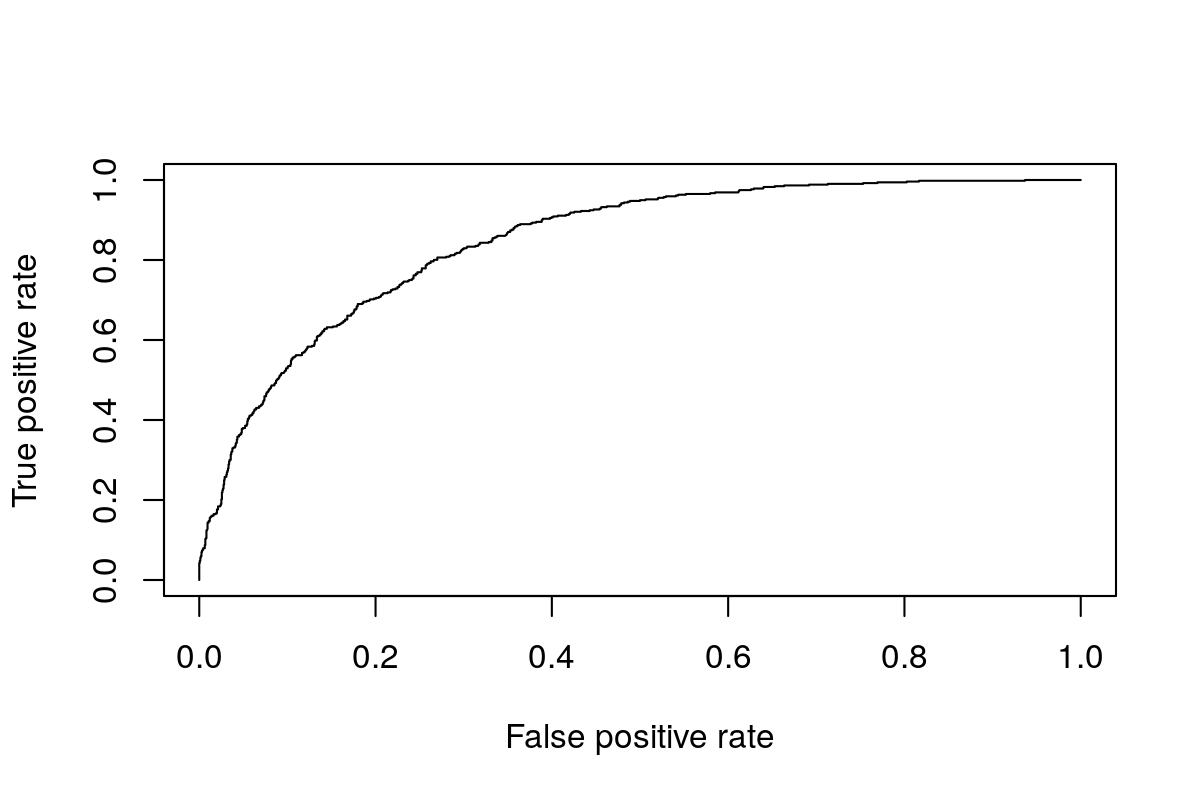

In [40]:
library(ROCR)
options(repr.plot.height=4,repr.plot.width=6)


p<-predict(model,dfchurn.test,type="response")

pr <- prediction(p, dfchurn.test$Churn)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [41]:
prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

[1] "The AUC is 0.846264765596154"

Repasemos la matriz de confusión:

|.|Condición positiva|Condición negativa|
|-|-|-|
|Predecimos condición positiva| $M_{11}$ | $M_{12}$|
|Predecimos condición negativa| $M_{21}$| $M_{22}$ |

**Precisión** : $\frac{M_{11}}{M_{12}+M_{11}}$. Cuantos aciertos tengo del total de predicciones.

**Exhaustividad** (recall): $\frac{M_{11}}{M_{21}+M_{11}}$. Que ratio de los aciertos positivos soy capaz de encontrar.

**Exactitud** (Accuracy): $\frac{M_{11}+M_{22}}{M_{11}+M_{12}+M_{21}+M_{22}}$: Cuantas predicciones correctas he hecho.

**Valor-F**: $F_\beta=(1+\beta^2)\frac{Precisión·Exhaustividad}{\beta^2·Precisión+Exhaustividad}$


In [42]:
library(caret)
library(e1071)

cf_m<-confusionMatrix(factor(p>0.5,labels=c("No","Yes")), dfchurn.test$Churn,positive="Yes")
cf_m
# Más información de como obtener esas figuras:
# https://www.rdocumentation.org/packages/caret/versions/6.0-85/topics/confusionMatrix

Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1420  226
       Yes  176  290
                                          
               Accuracy : 0.8097          
                 95% CI : (0.7923, 0.8262)
    No Information Rate : 0.7557          
    P-Value [Acc > NIR] : 1.771e-09       
                                          
                  Kappa : 0.4671          
                                          
 Mcnemar's Test P-Value : 0.01453         
                                          
            Sensitivity : 0.5620          
            Specificity : 0.8897          
         Pos Pred Value : 0.6223          
         Neg Pred Value : 0.8627          
             Prevalence : 0.2443          
         Detection Rate : 0.1373          
   Detection Prevalence : 0.2206          
      Balanced Accuracy : 0.7259          
                                          
       'Positive' Class : Yes             
                        

In [43]:
paste("La precisión es:",cf_m$table[2,2]/sum(cf_m$table[2,]))
paste("La exhaustividad (recall, sensitivity) es:",cf_m$table[2,2]/sum(cf_m$table[,2]))
paste("La exactitud (accuracy) es:",(cf_m$table[2,2]+cf_m$table[1,1])/sum(cf_m$table))

[1] "La precisión es: 0.622317596566524"

[1] "La exhaustividad (recall, sensitivity) es: 0.562015503875969"

[1] "La exactitud (accuracy) es: 0.809659090909091"

In [44]:
library(MASS)
model<-glm(data=dfchurn.train,formula=Churn~.,family=binomial())

# Nos encuentra el modelo con menor AIC
model_optim_aic<-stepAIC(model, direction="both", trace=0)

In [45]:
summary(model_optim_aic)


Call:
glm(formula = Churn ~ SeniorCitizen + Dependents + tenure + MultipleLines + 
    InternetService + Contract + PaperlessBilling + PaymentMethod + 
    TotalCharges, family = binomial(), data = dfchurn.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7992  -0.6995  -0.2975   0.7915   3.4825  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -6.346e-01  1.449e-01  -4.381 1.18e-05 ***
SeniorCitizenYes                      2.032e-01  9.843e-02   2.065 0.038951 *  
DependentsYes                        -2.148e-01  9.588e-02  -2.240 0.025074 *  
tenure                               -5.910e-02  6.872e-03  -8.600  < 2e-16 ***
MultipleLinesNo phone service         6.956e-01  1.522e-01   4.570 4.88e-06 ***
MultipleLinesYes                      2.347e-01  9.368e-02   2.506 0.012221 *  
InternetServiceFiber optic            8.853e-01  1.127e-01   7.855 4.00e-15 ***
InternetServiceNo

El caso de PaymentMethod es bastante curioso: Hay valores para los cuales la diferencia no es estadísitcamente significativa, pero hay otros que sí.

El único valor estadísticamente significativo parece que es "Electronic check"

Dentro de esta variable categórica vamos a comprobar que valores podemos separar y cuales agrupar.

In [46]:
levels(dfchurn$PaymentMethod)

[1] "Bank transfer (automatic)" "Credit card (automatic)"  
[3] "Electronic check"          "Mailed check"

In [47]:
tbl_payment<-table( dfchurn[c("Churn","PaymentMethod")])
tbl_payment

     PaymentMethod
Churn Bank transfer (automatic) Credit card (automatic) Electronic check
  No                       1286                    1290             1294
  Yes                       258                     232             1071
     PaymentMethod
Churn Mailed check
  No          1304
  Yes          308

Hacemos un test chi-cuadrado para corroborar que la probabilidad de churn depende del método de pago.

In [48]:
chisq.test(tbl_payment)


	Pearson's Chi-squared test

data:  tbl_payment
X-squared = 648.14, df = 3, p-value < 2.2e-16


El test estadístico nos dice que al menos un método de pago es diferente:

In [49]:
prop.table(tbl_payment,margin=2)

     PaymentMethod
Churn Bank transfer (automatic) Credit card (automatic) Electronic check
  No                  0.8329016               0.8475690        0.5471459
  Yes                 0.1670984               0.1524310        0.4528541
     PaymentMethod
Churn Mailed check
  No     0.8089330
  Yes    0.1910670

In [50]:
df_payment<-data.frame(apply(tbl_payment,2,function(x){binom.test(x)$conf.int}))
df_payment

Bank.transfer..automatic.,Credit.card..automatic.,Electronic.check,Mailed.check
<dbl>,<dbl>,<dbl>,<dbl>
0.8133406,0.8285144,0.5268250,0.7888753
0.8511870,0.8652714,0.5673498,0.8278588


Podemos juntar todos los grupos en "Electronic check" y "Otro".

In [51]:
dfchurn$ElectronicCheck<-factor(dfchurn$PaymentMethod=="Electronic check",labels=c("No","Yes"))
dfchurn.train<-dfchurn[idx,]
dfchurn.test<-dfchurn[-idx,]

In [52]:
model<-glm(formula = Churn ~ SeniorCitizen + Dependents + tenure + MultipleLines + 
    InternetService + Contract + PaperlessBilling + ElectronicCheck + 
    TotalCharges, family = binomial(), data = dfchurn.train)
summary(model)


Call:
glm(formula = Churn ~ SeniorCitizen + Dependents + tenure + MultipleLines + 
    InternetService + Contract + PaperlessBilling + ElectronicCheck + 
    TotalCharges, family = binomial(), data = dfchurn.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7990  -0.6944  -0.2989   0.7916   3.4692  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -7.190e-01  1.138e-01  -6.316 2.68e-10 ***
SeniorCitizenYes               2.054e-01  9.838e-02   2.088 0.036813 *  
DependentsYes                 -2.123e-01  9.583e-02  -2.216 0.026718 *  
tenure                        -5.855e-02  6.797e-03  -8.614  < 2e-16 ***
MultipleLinesNo phone service  6.923e-01  1.520e-01   4.553 5.29e-06 ***
MultipleLinesYes               2.357e-01  9.363e-02   2.518 0.011811 *  
InternetServiceFiber optic     8.932e-01  1.120e-01   7.977 1.50e-15 ***
InternetServiceNo             -5.281e-01  1.533e-01  -3.445 0.000571 **

In [53]:
p<-predict(model,dfchurn.test,type="response")
head(p)

3          4          7          8          9         10 
0.39992529 0.05635187 0.46822961 0.37171670 0.61578046 0.01418455

In [54]:
cf_m<-confusionMatrix(factor(p>0.5,labels=c("No","Yes")), dfchurn.test$Churn,positive="Yes")
cf_m

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1423  227
       Yes  173  289
                                          
               Accuracy : 0.8106          
                 95% CI : (0.7932, 0.8271)
    No Information Rate : 0.7557          
    P-Value [Acc > NIR] : 9.183e-10       
                                          
                  Kappa : 0.4683          
                                          
 Mcnemar's Test P-Value : 0.008049        
                                          
            Sensitivity : 0.5601          
            Specificity : 0.8916          
         Pos Pred Value : 0.6255          
         Neg Pred Value : 0.8624          
             Prevalence : 0.2443          
         Detection Rate : 0.1368          
   Detection Prevalence : 0.2188          
      Balanced Accuracy : 0.7258          
                                          
       'Positive' Class : Yes             
                        

In [55]:
cf_m$table[1,1]/sum(cf_m$table[,1])

[1] 0.891604

In [56]:
paste("La precisión es:",cf_m$table[2,2]/sum(cf_m$table[2,]))
paste("La exhaustividad (recall, sensitivity) es:",cf_m$table[2,2]/sum(cf_m$table[,2]))
paste("La exactitud (accuracy) es:",(cf_m$table[2,2]+cf_m$table[1,1])/sum(cf_m$table))

[1] "La precisión es: 0.625541125541126"

[1] "La exhaustividad (recall, sensitivity) es: 0.560077519379845"

[1] "La exactitud (accuracy) es: 0.810606060606061"

In [57]:
pr <- prediction(p, dfchurn.test$Churn)

prf_auc=performance(pr, measure = "auc")
paste("The AUC is",prf_auc@y.values[[1]])

[1] "The AUC is 0.846927153154196"

Se puede profundizar más en estos datos mirando el notebook:

https://www.kaggle.com/farazrahman/telco-customer-churn-logisticregression